In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df_model = pd.read_csv("df_model.csv", index_col=0)

In [2]:
X = df_model.drop("target", axis=1)
y = df_model["target"]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
y_pred = model.predict(X_test)

In [6]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

In [7]:
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 3.55
MAE: 2.63


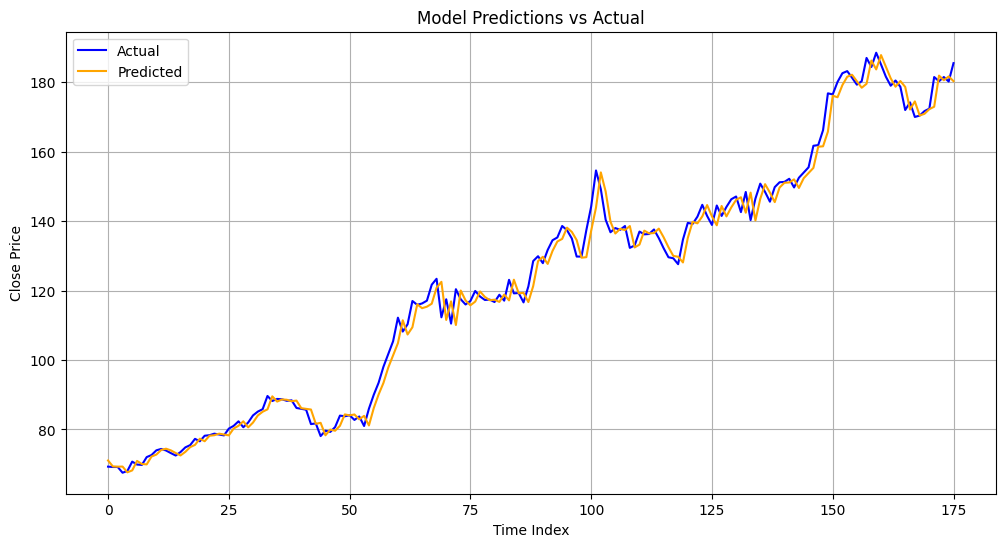

In [8]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual", color="blue")
plt.plot(y_pred, label="Predicted", color="orange")
plt.title("Model Predictions vs Actual")
plt.xlabel("Time Index")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 R² Score: {r2:.2f}")


Model Performance Metrics:
🔹 Mean Squared Error (MSE): 12.61
🔹 Mean Absolute Error (MAE): 2.63
🔹 R² Score: 0.99


In [10]:
last_row = df_model.drop("target", axis=1).iloc[[-1]]
next_day_pred = model.predict(last_row)[0]

print(f"Predicted next day price: {next_day_pred:.2f} TL")


Predicted next day price: 180.32 TL


In [11]:
import joblib

joblib.dump(model, "model.pkl")
print("Model saved as 'model.pkl' ")

Model saved as 'model.pkl' 
